<div style="direction:rtl;line-height:300%;background-color:#282C34;border-radius: 25px;">
    <img src='https://me.ut.ac.ir/documents/84413608/105534126/%D9%86%D8%B4%D8%A7%D9%86%20%D8%AF%D8%A7%D9%86%D8%B4%DA%AF%D8%A7%D9%87%20%D8%AA%D9%87%D8%B1%D8%A7%D9%86_%D8%AD%D8%A7%D8%B4%DB%8C%D9%87_vectorized2.png?t=1617776323063' alt="UT logo" width="110" height="110" align="left" style='padding-top: 15px; padding-left: 20px;'>
    <img src="https://engstudent.ut.ac.ir/wp-content/uploads/Fanni-Transparent.png" width="150" height="112" align="right" style='padding-top: 15px; padding-right: 20px;'>
    <font face="XB Zar" size=5>
        <div align=center>
            <font face="IranNastaliq" size=30 color=white>
                <p></p>
                <p></p>
به نام خدا
            </font>
            <br />
            <br />
            <font color=#1597E5>
دانشگاه تهران - دانشکده مهندسی برق و کامپیوتر
            </font>
            <br />
            <font color=#69DADB>
شبکه‌های عصبی و یادگیری عمیق
            </font>
            <br />
            <font color=#FFA400>
پاییز ۱۴۰۱
        </div>
        <hr color=#6ECB63/>
        <font color=#FF5C58 size=6>
            <div align=center>
پروژه اول
            </div>
        </font>
        <br />
        <div align=center>
        <font color=yellow>
حسام اسداله‌زاده - مسعود طهماسبی
            <br />
            </font>
        </div>
        <!hr color=#6ECB63/>
        <style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>            

</div>
</div>
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown 1jl9pdVqvP5m_MD9zG7fdwCRbS1OooaR4
!rm -rf Attachments __MACOSX
!unzip HW1.zip

Downloading...
From: https://drive.google.com/uc?id=1jl9pdVqvP5m_MD9zG7fdwCRbS1OooaR4
To: /content/HW1.zip
100% 1.80M/1.80M [00:00<00:00, 161MB/s]
Archive:  HW1.zip
   creating: Attachments/
  inflating: __MACOSX/._Attachments  
  inflating: Attachments/.DS_Store   
  inflating: __MACOSX/Attachments/._.DS_Store  
   creating: Attachments/Q3_Dataset/
  inflating: __MACOSX/Attachments/._Q3_Dataset  
   creating: Attachments/Q2_Dataset/
  inflating: __MACOSX/Attachments/._Q2_Dataset  
  inflating: Attachments/Q3.pdf      
  inflating: __MACOSX/Attachments/._Q3.pdf  
   creating: Attachments/Q4_Dataset/
  inflating: __MACOSX/Attachments/._Q4_Dataset  
  inflating: Attachments/Q3_Dataset/ratings.csv  
  inflating: __MACOSX/Attachments/Q3_Dataset/._ratings.csv  
  inflating: Attachments/Q3_Dataset/movies.csv  
  inflating: __MACOSX/Attachments/Q3_Dataset/._movies.csv  
  inflating: Attachments/Q2_Dataset/MadaLine.csv  
  inflating: __MACOSX/Attachments/Q2_Dataset/._MadaLine.csv  
  inflating

# Question 1

In [ ]:
# Mcculloch & Pitts Neuron - XOR
def XOR(x1 , x2):
  threshold = 2
  Z = np.array([0, 0])
  Z[0] = 2*x1 - x2
  Z[1] = 2*x2 - x1
  y1 , y2 , y = 0, 0, 0
  if Z[0] >= 2:
      y1 = 1
  if Z[1] >= 2: 
      y2 = 1
  y =  2*y1 + 2*y2
  return 1 if y >= threshold else 0
 
# Mcculloch & Pitts Neuron - AND
def AND(x1, x2):
  threshold = 2
  y = x1 + x2
  return 1 if y >= threshold else 0

In [ ]:
def mcculloch_pitts_multiplier(b):
    a1, a0 = b[0], b[1]
    b1, b0 = b[2], b[3]
    Z11 = AND(a0, b1)
    Z12 = AND(a0, b0)
    Z13 = AND(a1, b0)
    Z14 = AND(a1, b1)
    Z21 = XOR(Z11, Z13)
    Z22 = AND(Z13, Z11)
    C = np.array([0, 0, 0, 0])
    C[0] = Z12
    C[1] = Z21
    C[2] = XOR(Z22, Z14)
    C[3] = AND(Z14, Z22)
    return a1, a0, b1, b0, C[::-1]

In [ ]:
import itertools
binaries = list(itertools.product([0, 1], repeat=4))
print("A  *  B -> result")
for b in binaries:    
    a1, a0, b1, b0, res = mcculloch_pitts_multiplier(b)
    print(a1,a0, ' * ', b1,b0, sep='', end='\t = ')
    print(res[0], res[1], res[2], res[3], sep='')

A  *  B -> result
00 * 00	 = 0000
00 * 01	 = 0000
00 * 10	 = 0000
00 * 11	 = 0000
01 * 00	 = 0000
01 * 01	 = 0001
01 * 10	 = 0010
01 * 11	 = 0011
10 * 00	 = 0000
10 * 01	 = 0010
10 * 10	 = 0100
10 * 11	 = 0110
11 * 00	 = 0000
11 * 01	 = 0011
11 * 10	 = 0110
11 * 11	 = 1001


# Question 2



## Part 1

In [ ]:
error = np.infty
threshold = 5.
epochs = 10

In [ ]:
np.random.seed(313)
x1 = np.random.normal(1, 0.3, 100)
y1 = np.random.normal(1, 0.3, 100)

x2 = np.random.normal(-1, 0.3, 100)
y2 = np.random.normal(-1, 0.3, 100)

t1 = -np.ones((1, 100))
t2 = np.ones((1, 100))

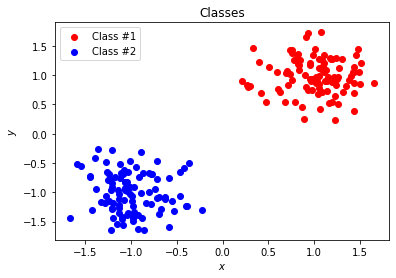

In [ ]:
plt.scatter(x1, y1, label='Class #1', color='red')
plt.scatter(x2, y2, label='Class #2', color='blue')
plt.legend(loc='upper left')
plt.title('Classes')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.show()

### Adaline

In [ ]:
class Adaline:
    def __init__(self):
        self.w = np.random.randn(1, 2)
        self.b = np.array([np.random.randint(1, 5)])
        self.learning_rate = 0.001

    def net(self, x):
        return self.w@x + self.b

    def f(self, net):
        return 1 if net >= 0. else -1.

    def update(self, x, net, t):
        for i in range(t.shape[1]):
            self.w = self.w + self.learning_rate * (t[0, i] - net[0, i]) * x[:, i]
            self.b = self.b + self.learning_rate * (t[0, i] - net[0, i])
    
    def error(self,net,t):
      return ((t-net)**2).sum()/2

In [ ]:
def plot_adaline(model, x1, y1, x2, y2, errors, xlim=None, ylim=None):
    x = np.arange(xlim[0], xlim[1], 0.05)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(x1, y1, label='Class #1', color='red')
    plt.scatter(x2, y2, label='Class #2', color='blue')
    plt.plot(x, (-model.w[0, 0]*x-model.b[0])/model.w[0, 1], color='black')
    plt.legend(loc='upper left')
    plt.title('Classes')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    if ylim != None:
        plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)
    plt.subplot(1, 2, 2)
    plt.plot(errors)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.grid()
    plt.show()

In [ ]:
def train_adaline(x1, y1, x2, y2, t1, t2, threshold=5.):
    model = Adaline()
    error = np.infty
    errors = []
    while error > threshold:
        net = model.net(np.vstack((x1, y1)))
        model.update(np.vstack((x1, y1)), net, t1)
        error = model.error(net, t1)

        net = model.net(np.vstack((x2, y2)))
        model.update(np.vstack((x2, y2)), net, t2)
        
        error += model.error(net, t2)
        errors.append(error)
    return model, errors

In [ ]:
model, errors = train_adaline(x1, y1, x2, y2, t1, t2)

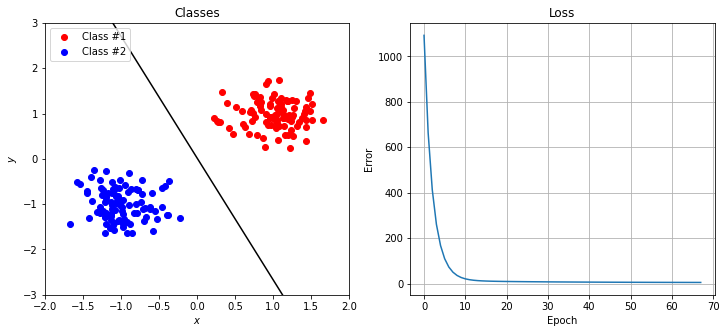

In [ ]:
plot_adaline(model, x1, y1, x2, y2, errors, xlim=[-2., 2.], ylim=[-3., 3.])

In [ ]:
model = Adaline()
errors = []
for epoch in range(epochs):
    net = model.net(np.vstack((x1, y1)))
    model.update(np.vstack((x1, y1)), net, t1)
    error = model.error(net,t1)

    net = model.net(np.vstack((x2, y2)))
    model.update(np.vstack((x2, y2)), net, t2)
    
    error += model.error(net,t2)
    errors.append(error)

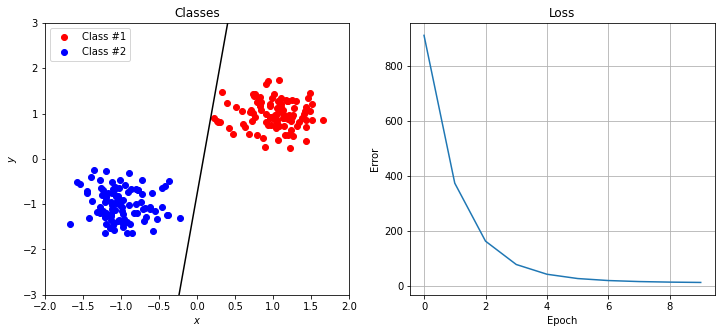

In [ ]:
plot_adaline(model, x1, y1, x2, y2, errors, xlim=[-2, 2], ylim=[-3, 3])

## Part 2

In [ ]:
np.random.seed(313)
x1 = np.random.normal(0, 0.6, 100)
y1 = np.random.normal(0, 0.6, 100)

x2 = np.random.normal(2, 0.8, 20)
y2 = np.random.normal(2, 0.8, 20)

t1 = -np.ones((1, 100))
t2 = np.ones((1, 20))
error = np.infty

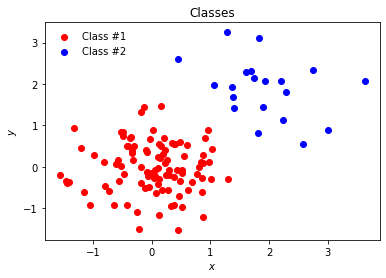

In [ ]:
plt.scatter(x1, y1, label='Class #1', color='red')
plt.scatter(x2, y2, label='Class #2', color='blue')
plt.legend(loc='upper left', frameon=False)
plt.title('Classes')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.show()

In [ ]:
model, errors = train_adaline(x1, y1, x2, y2, t1, t2, 10)

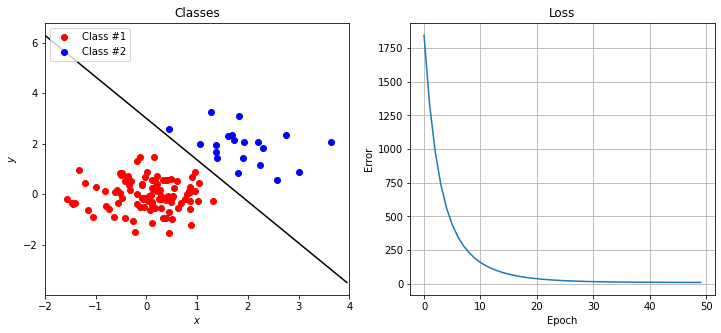

In [ ]:
plot_adaline(model, x1, y1, x2, y2, errors, xlim=[-2, 4])

In [ ]:
model = Adaline()

errors = []
for epoch in range(epochs):
    net = model.net(np.vstack((x1, y1)))
    model.update(np.vstack((x1, y1)), net, t1)
    error = model.error(net,t1)

    net = model.net(np.vstack((x2, y2)))
    model.update(np.vstack((x2, y2)), net, t2)
    
    error += model.error(net,t2)
    errors.append(error)

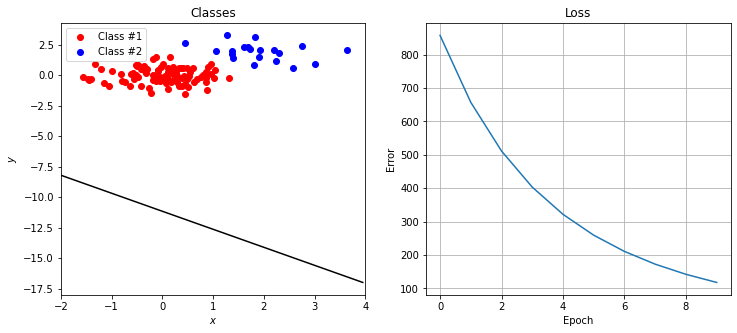

In [ ]:
plot_adaline(model, x1, y1, x2, y2, errors, [-2, 4])

## Part 3

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv('Attachments/Q2_Dataset/MadaLine.csv', names=['x', 'y', 't'])
df['t'] = df['t'].replace({0: -1.})

In [ ]:
df.head()

,x,y,t
0,-0.642823,0.720606,-1.0
1,-0.218126,0.677263,-1.0
2,-0.582930,-0.347496,-1.0
3,0.285127,0.091750,-1.0
4,-0.335577,-0.313893,-1.0


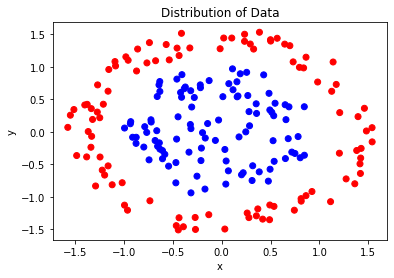

In [ ]:
plt.scatter(df['x'], df['y'], c=df['t'], cmap='bwr')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribution of Data')
plt.show()

### Madaline

In [ ]:
class Madaline:
    def __init__(self, n, lr=0.9):
        self.n = n
        self.z_in = 0
        self.y = 0
        self.err = 0
        np.random.seed(102)
        self.w = np.random.random([n, 2])
        self.b = np.random.random([n, 1])
        self.w2 = np.array([1./self.n]*self.n)
        self.b2 = np.array([(self.n-1.)/self.n])
        self.learning_rate = lr

    def net(self, x):
        self.z_in = self.w@x + self.b
        z  = self.f(self.z_in)
        y_in  = self.w2@z + self.b2
        self.y = self.f(y_in)
        return self.y
    
    def f(self, net):
        return np.where(net >= 0, 1., -1.)

    def update(self, x, t):
        for i in range(t.shape[1]):
            if t[0, i] != self.y[i]: # If t == y, no weight updates are required
                if t[0, i] == 1:     # If t == 1, then update weights on Zj, the unit whose net input is closest to 0
                    min_index = np.argmin(np.abs(self.z_in[:, i]))
                    self.w[min_index, :] = self.w[min_index, :] + self.learning_rate * (1. - self.z_in[min_index, i]) * x[:, i]
                    self.b[min_index, :] = self.b[min_index, :] + self.learning_rate * (1. - self.z_in[min_index, i])
                else:                # If t == —1, then update weights on all units Zk that have *positive* net input
                    for unit in range(self.n):
                        if self.z_in[unit, i] > 0:
                            self.w[unit, :] = self.w[unit, :] + self.learning_rate * (-1. - self.z_in[unit, i]) * x[:, i]
                            self.b[unit, :] = self.b[unit, :] + self.learning_rate * (-1. - self.z_in[unit, i])
            self.net(x)              # After each weight update, self.net is performed in order to update self.z_in

    def error(self, net, t):
      self.err = ((t-net)**2).sum()/2.
      return self.err

In [ ]:
def plot_madaline(model, df, n):
    plt.figure(figsize=(12, 5))
    x = np.arange(-2, 2, 0.05)
    y = np.arange(-5, 5, 0.05)
    xx, yy = np.meshgrid(x, y)
    Z = model.net((np.c_[xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.5)
    for i in range(model.n):
        plt.plot(x, (-model.w[i, 0]*x-model.b[i, 0])/model.w[i, 1], color='gray')
    plt.scatter(df['x'], df['y'], c=df['t'], cmap='bwr')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim([-3, 3])
    plt.title('Distribution of Data (n = '+str(n)+')')
    plt.show()

In [ ]:
def train_madaline(n, df, error_threshold, lr=0.9):
    model = Madaline(n, lr)
    errors = []
    t = df['t'].to_numpy().reshape((1, len(df)))
    pairs = np.vstack((df['x'], df['y']))
    pairs = shuffle(pairs, random_state=102)
    t = shuffle(t, random_state=102)
    error = np.inf
    while error > error_threshold:
        net = model.net(pairs)
        model.update(pairs, t)
        error = model.error(model.net(pairs), t)
        errors.append(error)
    # print(model.net(pairs), t, sep='\n')
    return model, errors

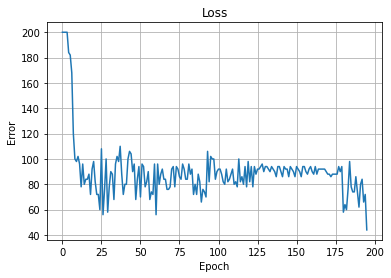

In [ ]:
model, errors = train_madaline(3, df, 45)

plt.plot(errors)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.show()

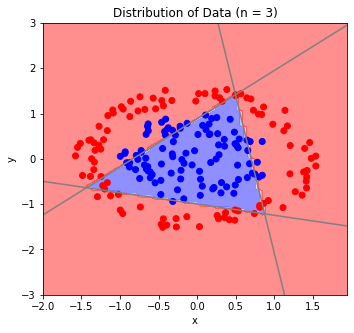

In [ ]:
plot_madaline(model, df, 3)

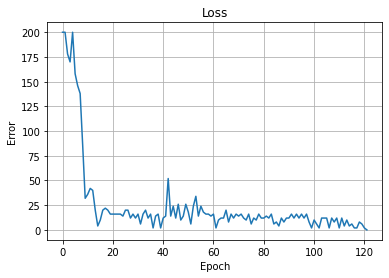

In [ ]:
model, errors = train_madaline(4, df, 0)

plt.plot(errors)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.show()

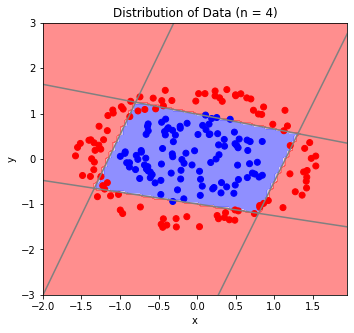

In [ ]:
plot_madaline(model, df, 4)

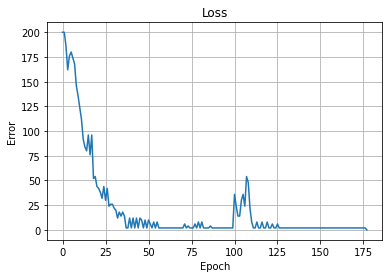

In [ ]:
model, errors = train_madaline(n=8, df=df, error_threshold=0, lr=0.535)

plt.plot(errors)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.show()

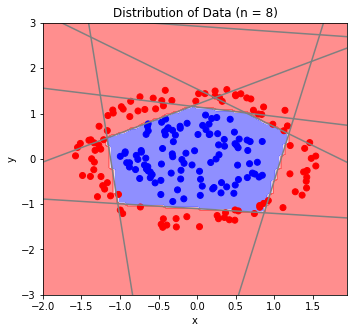

In [ ]:
plot_madaline(model, df, 8)

## Optional (XOR)

In [ ]:
df2 = pd.DataFrame({'x': [1.,1.,-1.,-1.], 'y': [1., -1., 1., -1.], 't':[-1., 1., 1., -1.]})

In [ ]:
df2

,x,y,t
0,1.0,1.0,-1.0
1,1.0,-1.0,1.0
2,-1.0,1.0,1.0
3,-1.0,-1.0,-1.0


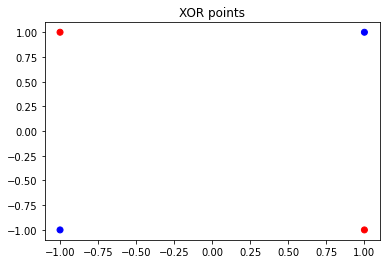

In [ ]:
plt.scatter(df2['x'], df2['y'], c=df2['t'], cmap='bwr')
plt.title('XOR points')
plt.show()

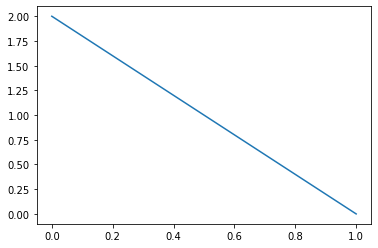

In [ ]:
model, errors = train_madaline(2, df2, 0)

plt.plot(errors)
plt.show()

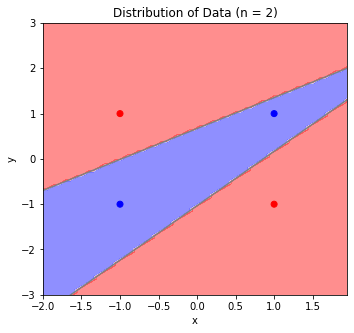

In [ ]:
plot_madaline(model, df2, 2)

# Question 4

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn.functional as F

In [ ]:
df = pd.read_csv("Attachments/Q4_Dataset/houses.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

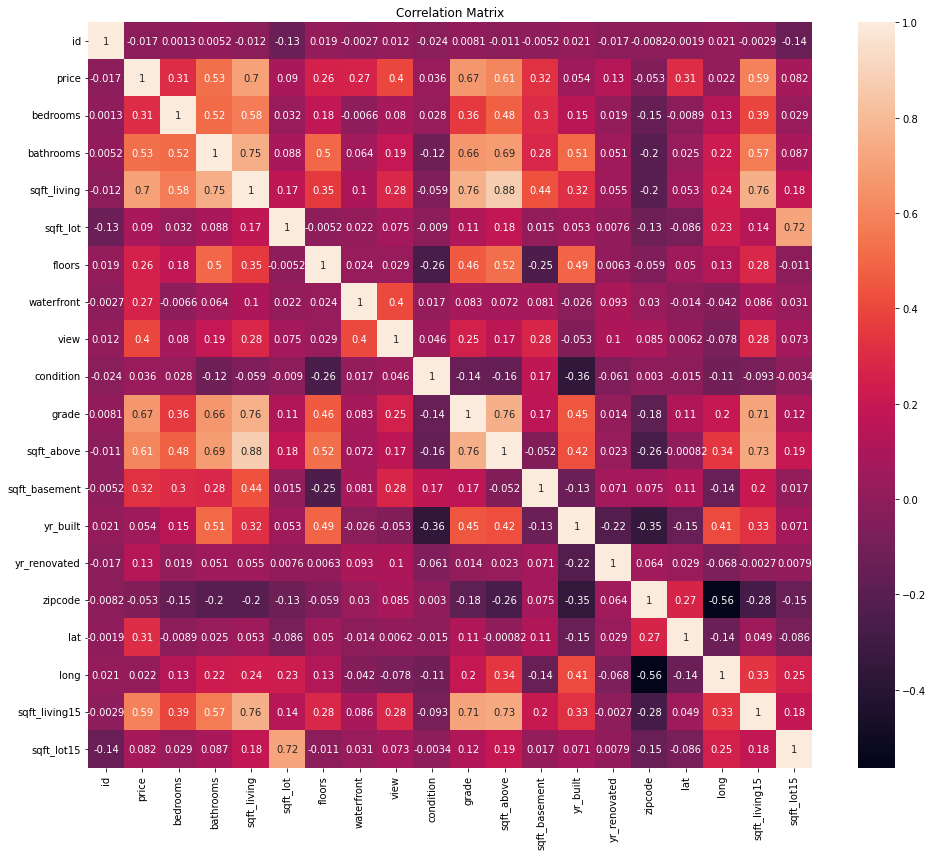

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

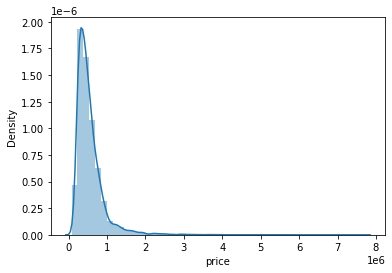

In [ ]:
sns.distplot(df['price'], hist=True, label='Price') # Using Seaborn
plt.show()

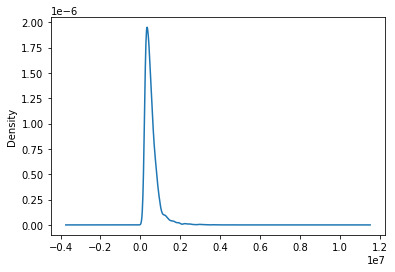

In [ ]:
# Kernel Density Estimation
df['price'].plot(kind='kde') # Using Pandas
plt.show()

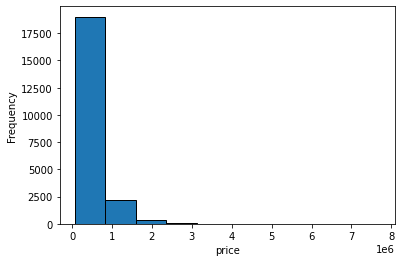

In [ ]:
df['price'].plot(kind='hist', edgecolor='black')
plt.xlabel('price')
plt.show()

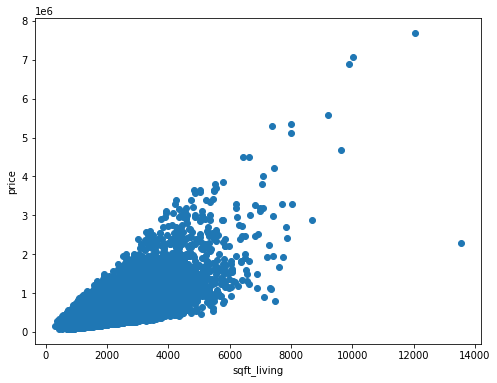

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [ ]:
# pd.to_datetime(df['date'], format='%Y%m%d')
df['year'] = df['date'].str[:4]
df['year'] = df['year'].astype('int64')
df['month'] = df['date'].str[4:6]
df['month'] = df['month'].astype('int64')
df = df.drop(['date'], axis=1)

In [ ]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [ ]:
# Obviously, id is not a relevant feature
x_train, x_test, y_train, y_test = train_test_split(
                            df.drop(['price', 'id'], axis=1), df[['price']],
                            test_size=0.2, random_state=200)

In [ ]:
y_train, y_test = np.array(y_train), np.array(y_test)

In [ ]:
x_scaler = MinMaxScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape, type(x_train)

((17290, 20), (4323, 20), (17290, 1), (4323, 1), numpy.ndarray)

## Building Model

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self): 
        super(MLP, self).__init__() 
        self.linear1 = torch.nn.Linear(20, 128)
        self.linear2 = torch.nn.Linear(128, 64)
        self.linear3 = torch.nn.Linear(64, 32)
        self.linear4 = torch.nn.Linear(32, 16)
        self.linear5 = torch.nn.Linear(16, 1)
   
    def forward(self, x): 
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = self.linear5(x)
        return x

In [ ]:
x_train, x_test, y_train, y_test = torch.Tensor(x_train), torch.Tensor(x_test), torch.Tensor(y_train), torch.Tensor(y_test)

In [ ]:
data_batch = torch.utils.data.TensorDataset(
    x_train, y_train
)
dataloader = torch.utils.data.DataLoader(
    data_batch, batch_size=1024
)

In [ ]:
def train_MLP(model, loss, opt, epochs=100):
    train_errors, val_errors = [], []
    for epoch in range(epochs): 
        for x_batch, y_batch in dataloader:
            predict_y = model(x_batch) 
            l = loss(predict_y, y_batch)
            opt.zero_grad() 
            l.backward() 
            opt.step() 
        train_errors.append(l.item())
        with torch.no_grad():
            y_pred = model(x_test)
            l_test = loss(y_pred, y_test)
            val_errors.append(l_test.item())
    return model, train_errors, val_errors

## Optimizers

```python 
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.6)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.1)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.8, 0.98))
```

## Using L1 Loss and Adam Optimizer

In [ ]:
model = MLP()
loss = torch.nn.SmoothL1Loss()
opt = torch.optim.Adam(model.parameters(), lr=0.1, betas=(0.8, 0.98))

In [ ]:
model, train_errors, val_errors = train_MLP(model, loss, opt, 200)

In [ ]:
print('Predicted \t\tY_true\t\tdiff')
with torch.no_grad():
    for i in np.random.choice(len(y_test), 10):
        print(model(x_test[i])[0], y_test[i][0],
              y_test[i][0]-model(x_test[i])[0], sep='\t')

Predicted 		Y_true		diff
tensor(453602.3125)	tensor(469000.)	tensor(15397.6875)
tensor(632424.5000)	tensor(527000.)	tensor(-105424.5000)
tensor(287440.9688)	tensor(249000.)	tensor(-38440.9688)
tensor(622859.8125)	tensor(682500.)	tensor(59640.1875)
tensor(1215048.6250)	tensor(1005000.)	tensor(-210048.6250)
tensor(674790.6250)	tensor(645000.)	tensor(-29790.6250)
tensor(421012.4375)	tensor(420000.)	tensor(-1012.4375)
tensor(341734.7500)	tensor(304000.)	tensor(-37734.7500)
tensor(387991.9062)	tensor(390000.)	tensor(2008.0938)
tensor(350810.4375)	tensor(367000.)	tensor(16189.5625)


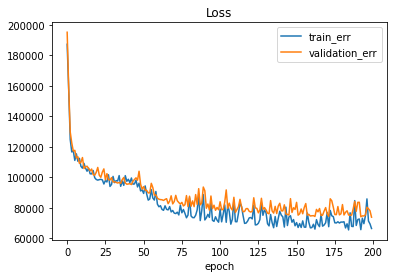

In [ ]:
plt.plot(train_errors, label='train_err')
plt.plot(val_errors, label='validation_err')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Using L2 Loss and Adam Optimizer

In [ ]:
model = MLP()
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.1, betas=(0.8, 0.98))

In [ ]:
model, train_errors, val_errors = train_MLP(model, loss, opt, 250)

In [ ]:
with torch.no_grad():
    for i in np.random.choice(len(y_test), 10):
        print(model(x_test[i])[0], y_test[i][0])

tensor(361515.6250) tensor(294950.)
tensor(361035.8438) tensor(320000.)
tensor(1010590.6875) tensor(995000.)
tensor(515907.3125) tensor(408000.)
tensor(290600.4375) tensor(246000.)
tensor(557003.1250) tensor(505000.)
tensor(325714.6875) tensor(340000.)
tensor(426501.0312) tensor(383000.)
tensor(415390.4062) tensor(375000.)
tensor(184317.8594) tensor(100000.)


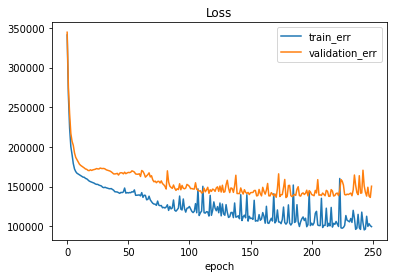

In [ ]:
plt.plot(np.sqrt(train_errors), label='train_err')
plt.plot(np.sqrt(val_errors), label='validation_err')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Using L1 Loss and RMSprop Optimizer


In [ ]:
model = MLP()
loss = torch.nn.SmoothL1Loss() 
opt = torch.optim.RMSprop(model.parameters(), lr=0.1)

In [ ]:
model, train_errors, val_errors = train_MLP(model, loss, opt, 200)

In [ ]:
with torch.no_grad():
    for i in np.random.choice(len(y_test), 10):
        print(model(x_test[i])[0], y_test[i])

tensor(277357.5625) tensor([224000.])
tensor(501298.1875) tensor([368000.])
tensor(510339.4375) tensor([430000.])
tensor(480904.5625) tensor([390000.])
tensor(244860.9688) tensor([220500.])
tensor(362805.2500) tensor([309950.])
tensor(609217.6875) tensor([445000.])
tensor(248479.1719) tensor([200000.])
tensor(381216.8125) tensor([255000.])
tensor(456515.5938) tensor([205000.])


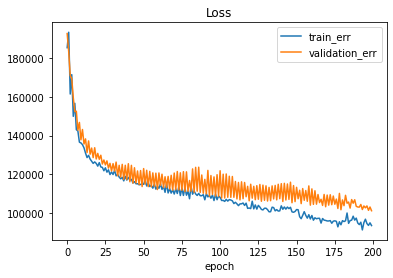

In [ ]:
plt.plot(train_errors, label='train_err')
plt.plot(val_errors, label='validation_err')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Using L2 Loss and RMSprop Optimizer

In [ ]:
model = MLP()
loss = torch.nn.MSELoss() 
opt = torch.optim.RMSprop(model.parameters(), lr=0.1)

In [ ]:
model, train_errors, val_errors = train_MLP(model, loss, opt, 200)

In [ ]:
with torch.no_grad():
    for i in np.random.choice(len(y_test), 10):
        print(model(x_test[i])[0], y_test[i])

tensor(493904.6875) tensor([475000.])
tensor(710950.1875) tensor([671000.])
tensor(535545.8125) tensor([500000.])
tensor(812414.8750) tensor([710000.])
tensor(750131.3125) tensor([825000.])
tensor(406043.3750) tensor([332900.])
tensor(388873.1562) tensor([475000.])
tensor(523541.6250) tensor([445000.])
tensor(576874.7500) tensor([450000.])
tensor(466406.9062) tensor([465000.])


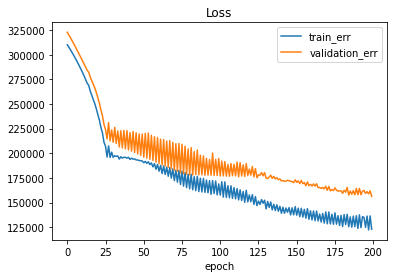

In [ ]:
plt.plot(np.sqrt(train_errors), label='train_err')
plt.plot(np.sqrt(val_errors), label='validation_err')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()